#**Основная часть** 

##**Задание**

Схема типового исследования, проводимого студентом в рамках курсовой работы, содержит выполнение следующих шагов:

1) Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.

2) Проведение разведочного анализа данных. 

3) Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

4) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

5) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.


6) Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.

7) Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.Формирование обучающей и тестовой выборок на основе исходного набора данных.

8) Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

9) Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

10) Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

11) Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

Приведенная схема исследования является рекомендуемой. В зависимости от решаемой задачи возможны модификации.

##**Последовательность действий**

В этом проекте я пытаюсь делать прогнозы, где задача прогнозирования состоит в том, чтобы определить, зарабатывает ли человек более 50 тысяч долларов в год. Я реализую классификацию случайных лесов с помощью Python и Scikit-Learn.

Я использую датасет "**Income classification data set**".


In [0]:
!pip install catboost

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression, LogisticRegressionCV
from sklearn.svm import  SVC
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.metrics import accuracy_score, roc_auc_score, mean_absolute_error


%matplotlib inline

sns.set(style="whitegrid")

In [0]:
df = pd.read_csv("/content/income_evaluation.csv")

##**Разведочный анализ данных**

In [0]:
print('размер датасета : ', df.shape)

размер датасета :  (32561, 15)


In [0]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = col_names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [0]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [0]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561,NaN,NaN,NaN,38.5816,13.6404,17,28,37,48,90
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561,NaN,NaN,NaN,189778,105550,12285,117827,178356,237051,1.48470e+06
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,32561,NaN,NaN,NaN,10.0807,2.57272,1,9,10,12,16
marital_status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### **Исследование котегориальных переменных**

In [0]:
categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [0]:
for var in categorical:
     print(df[var].value_counts()/np.float(len(df)))

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name:

In [0]:
#заменяем фейковые наны на настоящие
df['workclass'].replace(' ?', np.NaN, inplace=True)
df['occupation'].replace(' ?', np.NaN, inplace=True)
df['native_country'].replace(' ?', np.NaN, inplace=True)

In [0]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

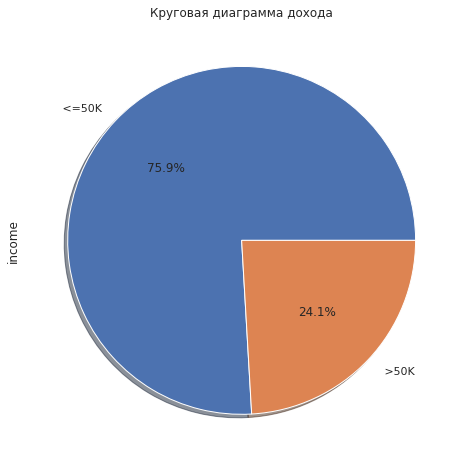

In [0]:
f,ax=plt.subplots(figsize=(18,8))

ax = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('Круговая диаграмма дохода')

plt.show()

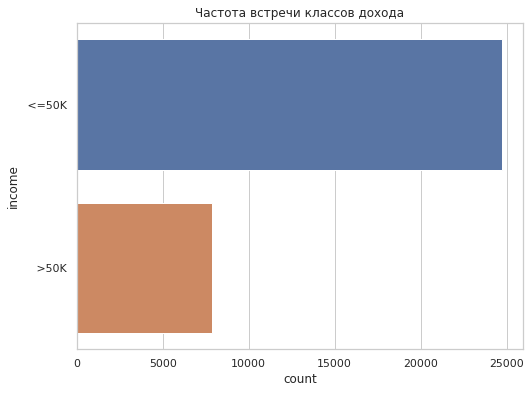

In [0]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="income", data=df)
ax.set_title("Частота встречи классов дохода")
plt.show()

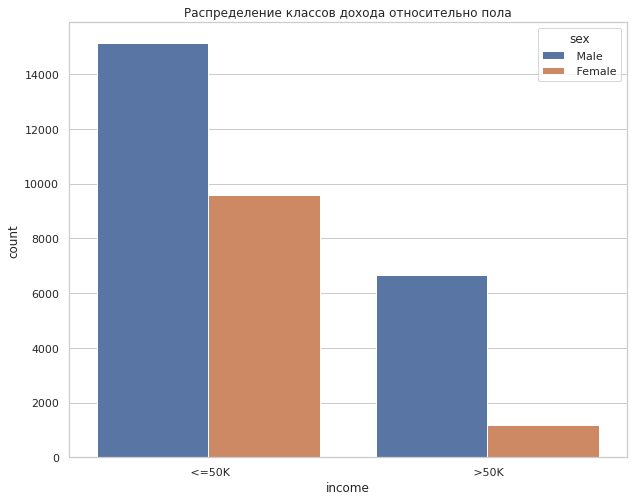

In [0]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="sex", data=df)
ax.set_title("Распределение классов дохода относительно пола")
plt.show()

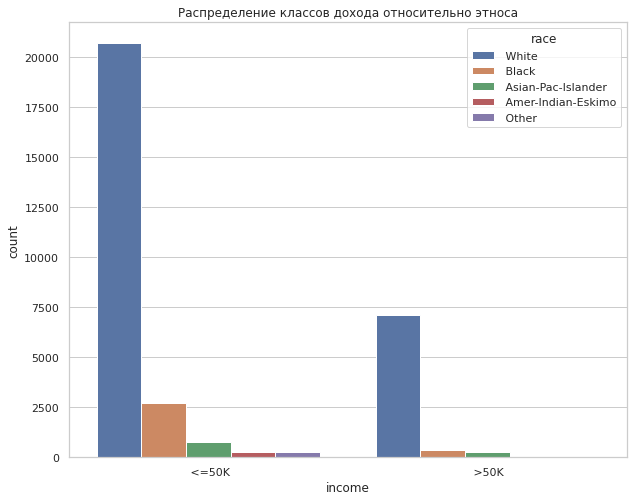

In [0]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=df)
ax.set_title("Распределение классов дохода относительно этноса")
plt.show()

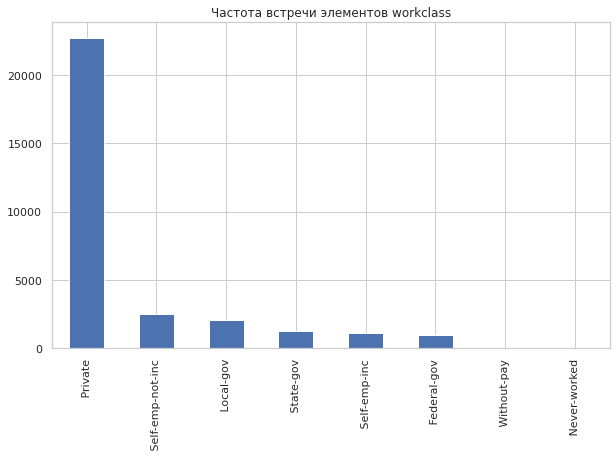

In [0]:
f, ax = plt.subplots(figsize=(10, 6))
ax = df['workclass'].value_counts().plot(kind="bar")
ax.set_title("Частота встречи элементов workclass")
plt.show()

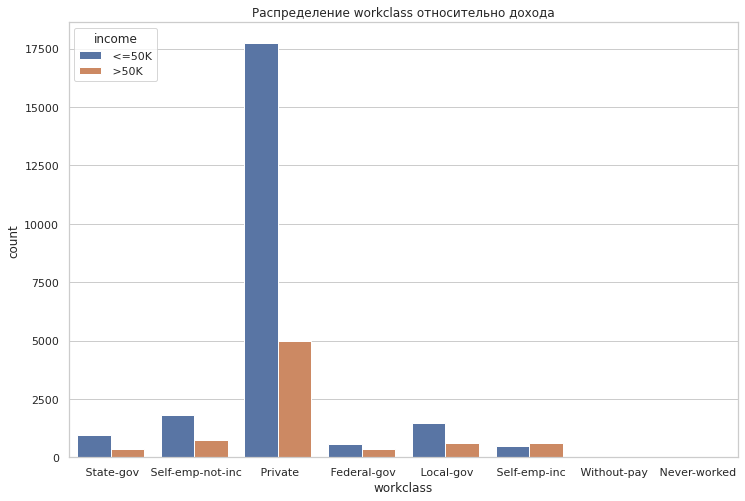

In [0]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="income", data=df)
ax.set_title("Распределение workclass относительно дохода")
plt.show()

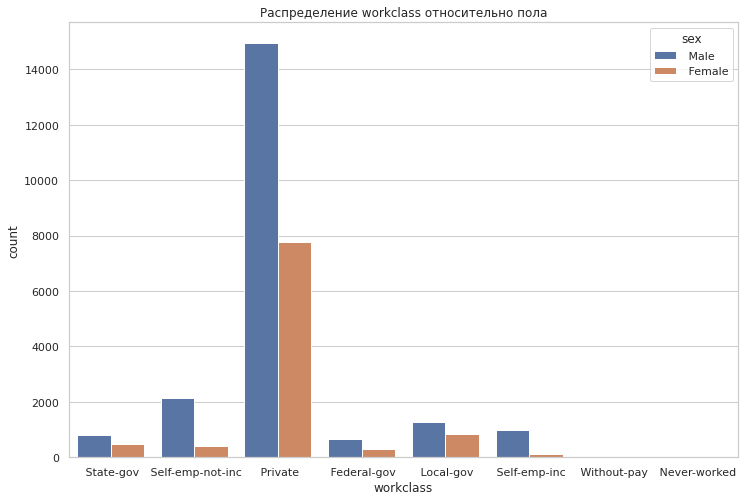

In [0]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="sex", data=df)
ax.set_title("Распределение workclass относительно пола")
plt.show()

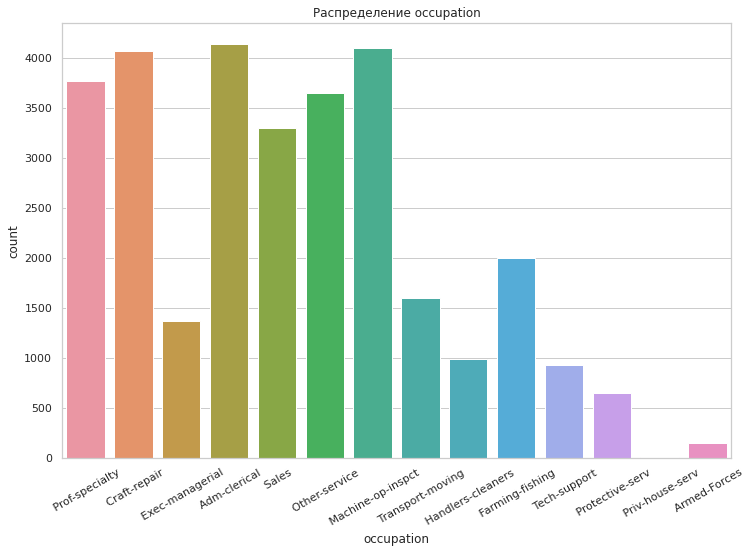

In [0]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=df)
ax.set_title("Распределение occupation")
ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)
plt.show()

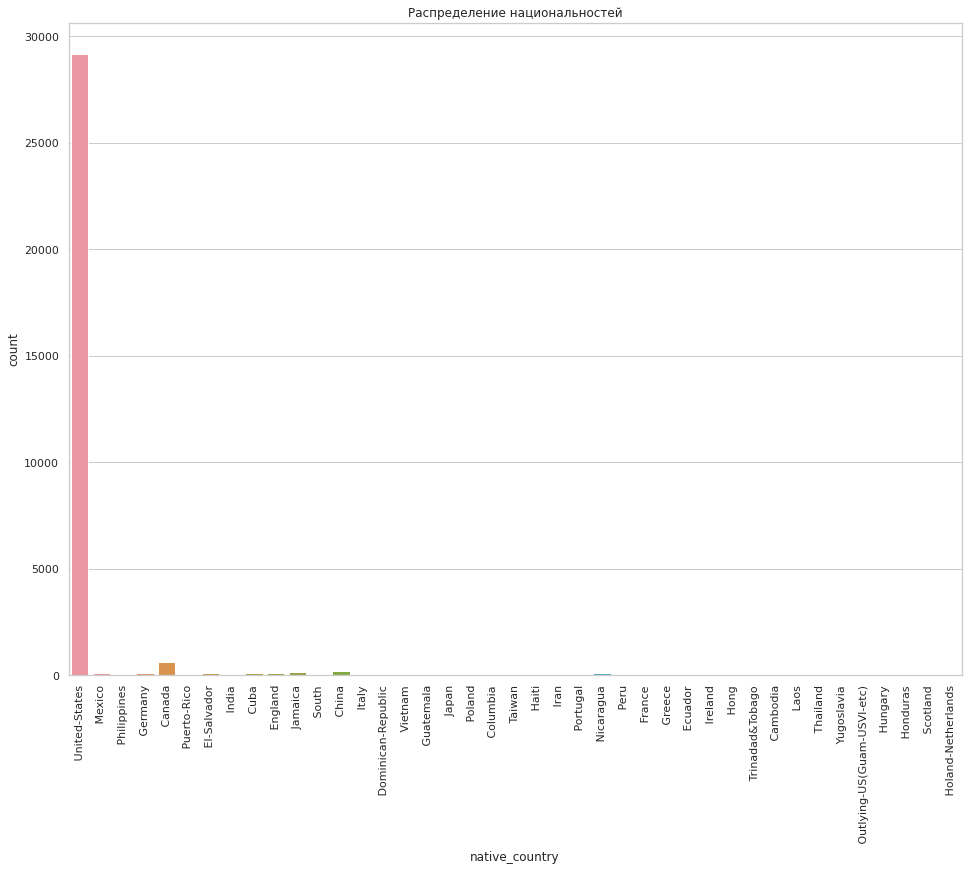

In [0]:
f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="native_country", data=df)
ax.set_title("Распределение национальностей")
ax.set_xticklabels(df.native_country.value_counts().index, rotation=90)
plt.show()

### **Исследование числовых переменных**

In [0]:
numerical = [var for var in df.columns if df[var].dtype!='O']
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [0]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [0]:
df['age'].nunique()

73

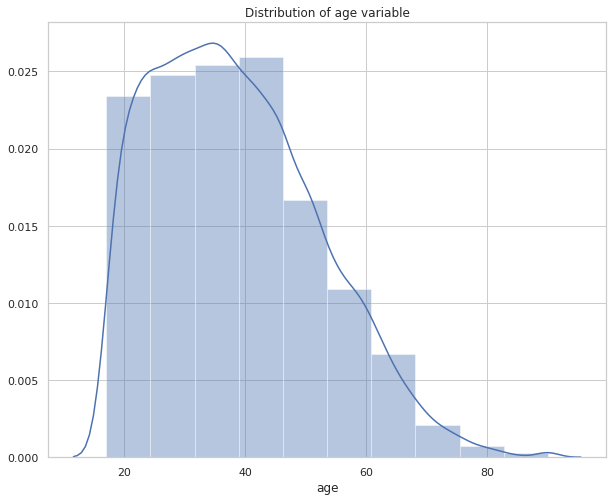

In [0]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.distplot(x, bins=10)
ax.set_title("Распределение age")
plt.show()

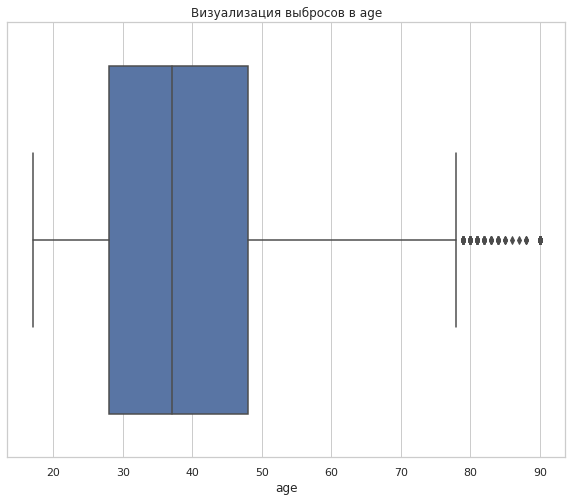

In [0]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.boxplot(x)
ax.set_title("Визуализация выбросов в age")
plt.show()

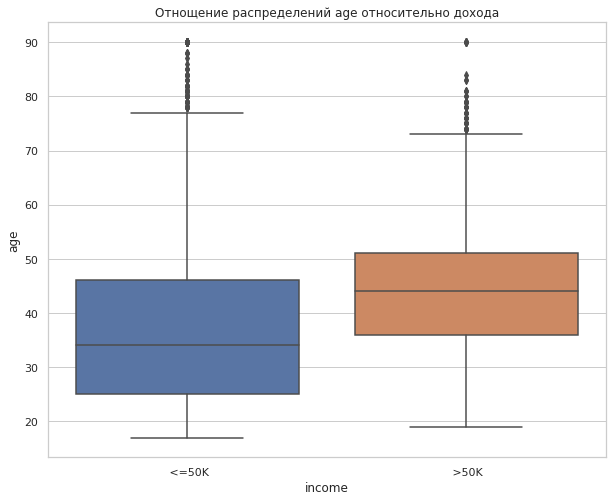

In [0]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Отнощение распределений age относительно дохода")
plt.show()

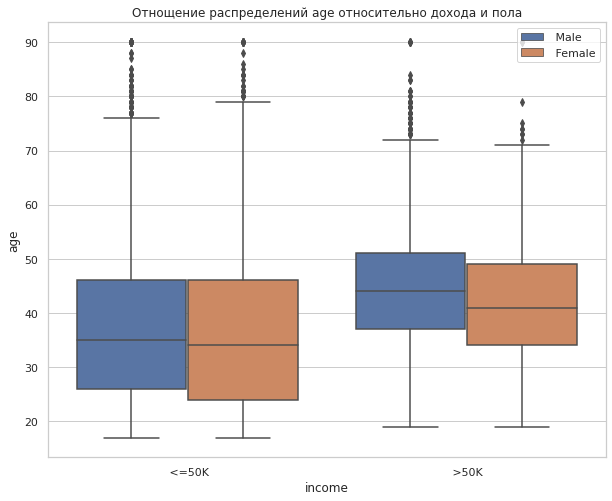

In [0]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", hue="sex", data=df)
ax.set_title("Отнощение распределений age относительно дохода и пола")
ax.legend(loc='upper right')
plt.show()

<Figure size 576x432 with 0 Axes>

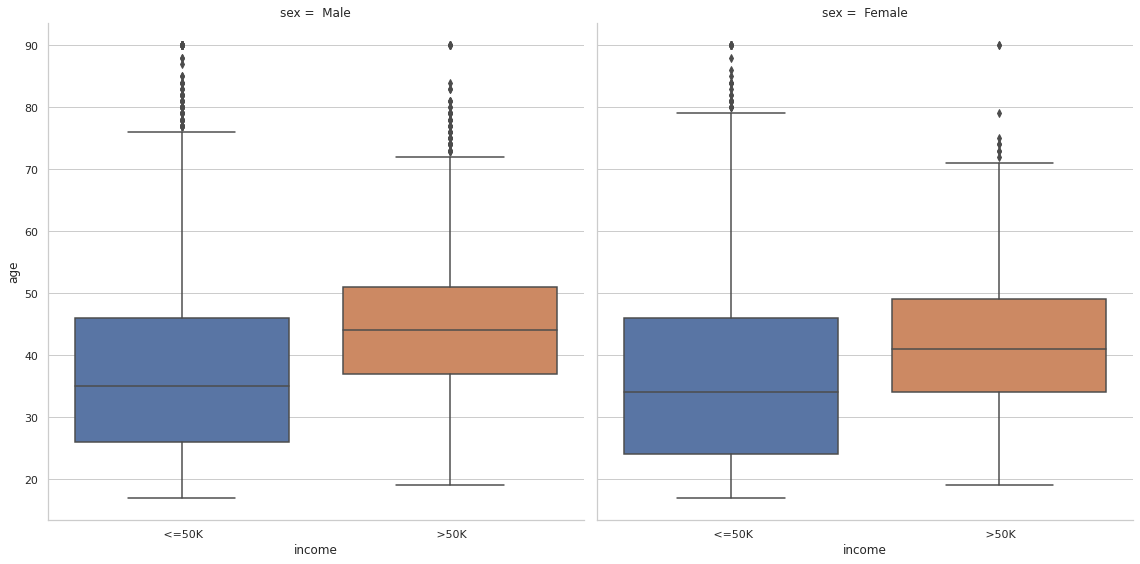

In [0]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="income", y="age", col="sex", data=df, kind="box", height=8, aspect=1)
plt.show()

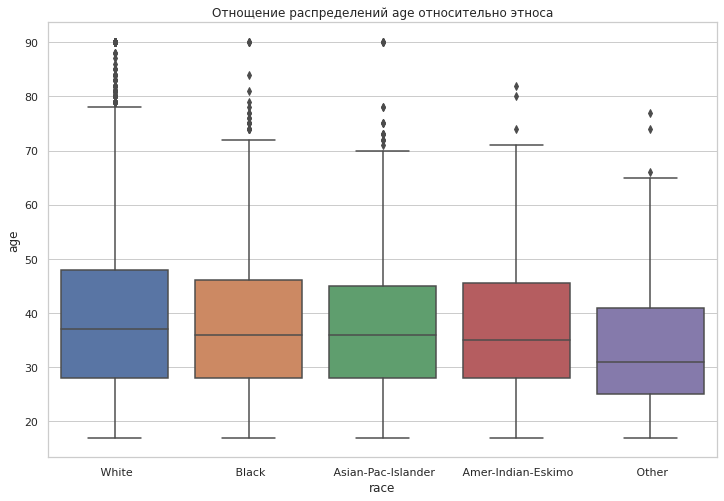

In [0]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='race', y="age", data = df)
plt.title("Отнощение распределений age относительно этноса")
plt.show()

In [0]:
#Корреляционная матрица
df.corr().style.format("{:.4}").background_gradient(axis=1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.0,-0.07665,0.03653,0.07767,0.05777,0.06876
fnlwgt,-0.07665,1.0,-0.04319,0.0004319,-0.01025,-0.01877
education_num,0.03653,-0.04319,1.0,0.1226,0.07992,0.1481
capital_gain,0.07767,0.0004319,0.1226,1.0,-0.03162,0.07841
capital_loss,0.05777,-0.01025,0.07992,-0.03162,1.0,0.05426
hours_per_week,0.06876,-0.01877,0.1481,0.07841,0.05426,1.0


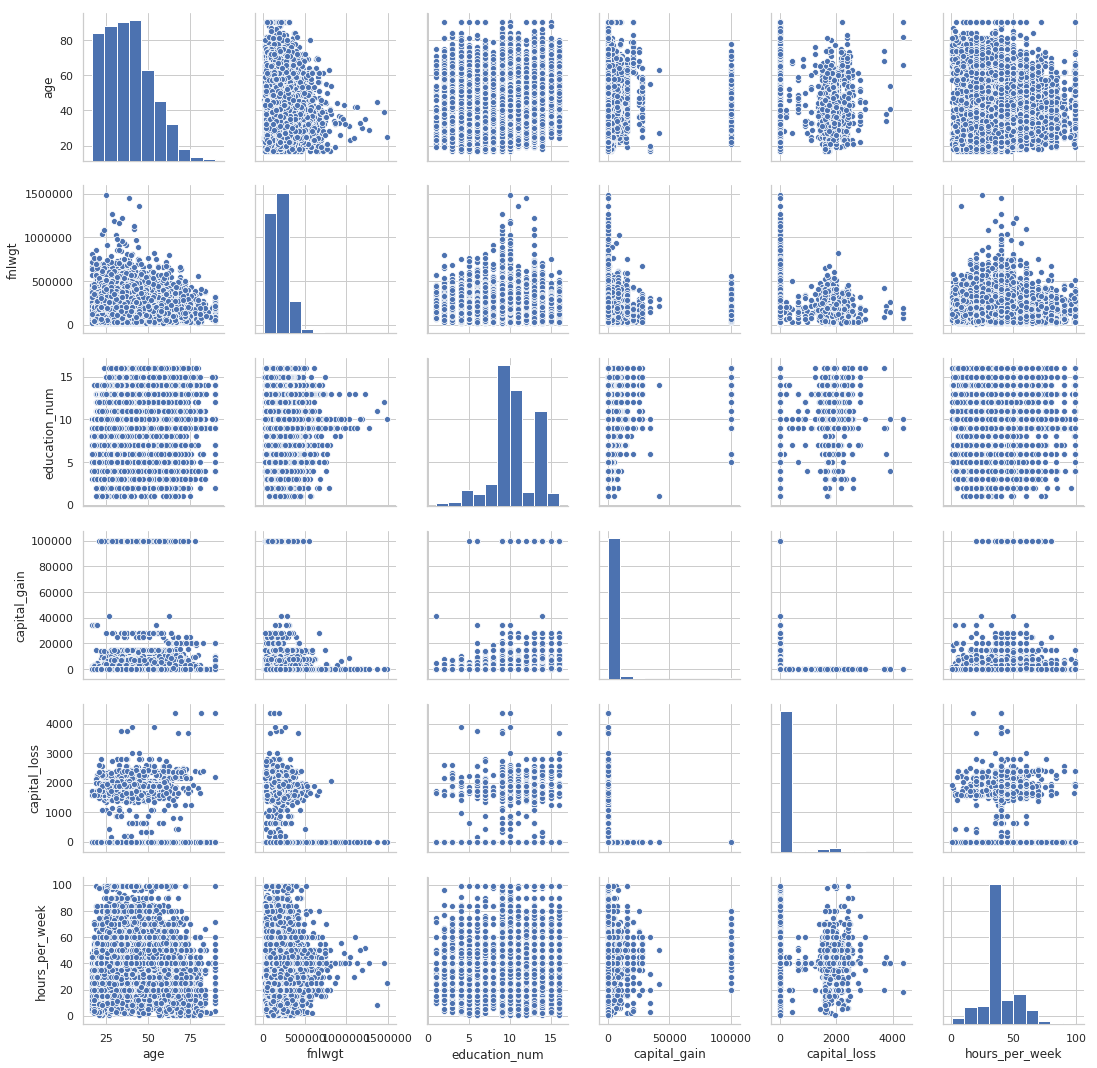

In [0]:
sns.pairplot(df)
plt.show()

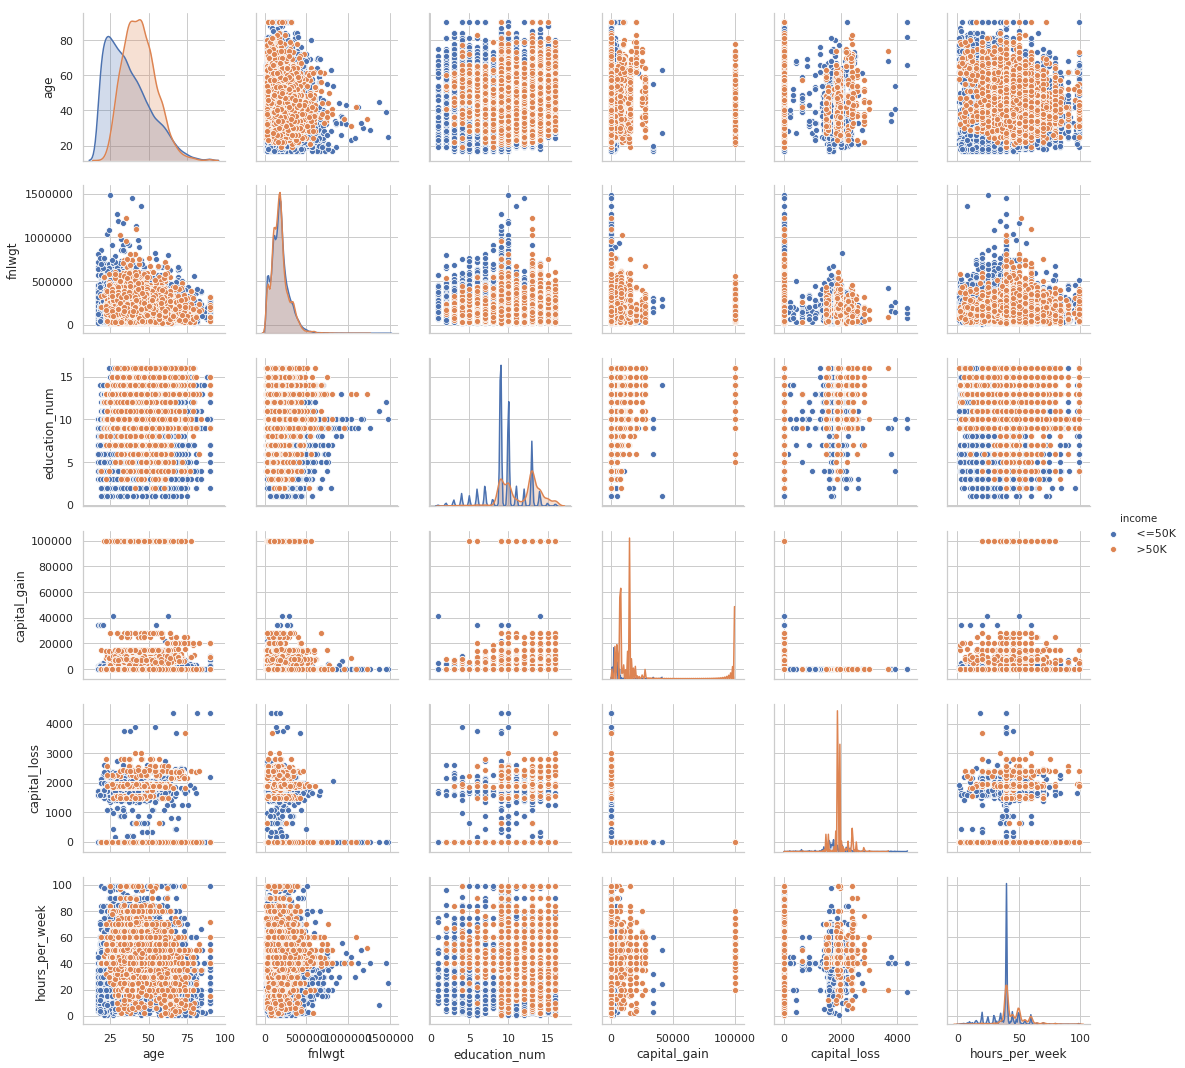

In [0]:
sns.pairplot(df, hue="income")
plt.show()

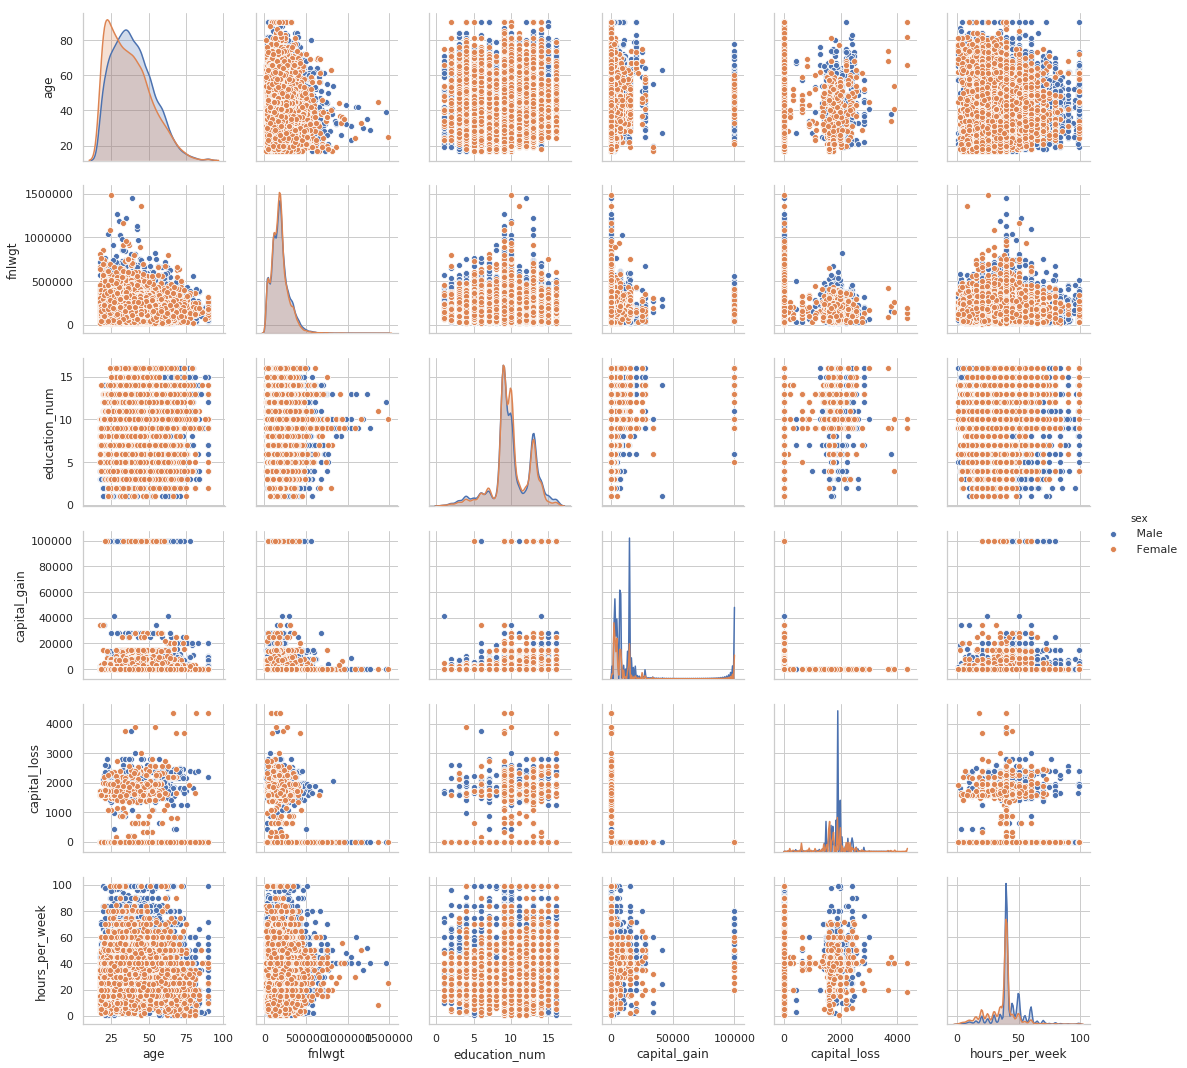

In [0]:
sns.pairplot(df, hue="sex")
plt.show()

## **Формирование тестовой и обучеющей выборок**

In [0]:
X = df.drop(['income'], axis=1)
y = df['income']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

## **Подготовка данных для моделей**

In [0]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [0]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [0]:
X_train[categorical].isnull().mean()

workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [0]:
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)    

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [0]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [0]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [0]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

### **Энкодинг признаков**


In [0]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [0]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [0]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,education_num,marital_status_1,marital_status_2,marital_status_3,marital_status_4,marital_status_5,marital_status_6,marital_status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,...,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,native_country_7,native_country_8,native_country_9,native_country_10,native_country_11,native_country_12,native_country_13,native_country_14,native_country_15,native_country_16,native_country_17,native_country_18,native_country_19,native_country_20,native_country_21,native_country_22,native_country_23,native_country_24,native_country_25,native_country_26,native_country_27,native_country_28,native_country_29,native_country_30,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train.shape

(22792, 105)

In [0]:
X_test.shape

(9769, 105)

### **Масштабирование признаков**

In [0]:
cols = X_train.columns

In [0]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [0]:
X_test = pd.DataFrame(X_test, columns=[cols])

## **Обучение моделей и подбор гиперпарамметров**

In [0]:
pipe.fit(X_train, y_train)

In [0]:
lr = LogisticRegressionCV()
lr.fit(X_train, y_train)
ans_lr = lr.predict(X_test)
print(accuracy_score(y_test, ans_lr))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8506500153546934


In [0]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
ans_dt = dt.predict(X_test)
print(accuracy_score(y_test, ans_dt))

0.8124680110553792


In [0]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
ans_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, ans_rfc))

0.8540280479066434


In [0]:
cb = CatBoostClassifier(loss_function='Logloss',
                        learning_rate = 0.2,
                        depth = 2,
                        l2_leaf_reg = 3)
cb.fit(X_train, y_train)
ans_cb = cb.predict(X_test)
print(accuracy_score(y_test, ans_cb))

0:	learn: 0.5556063	total: 10.3ms	remaining: 10.3s
1:	learn: 0.4768272	total: 19.3ms	remaining: 9.63s
2:	learn: 0.4444435	total: 29ms	remaining: 9.63s
3:	learn: 0.4130792	total: 38.3ms	remaining: 9.54s
4:	learn: 0.3960990	total: 47.6ms	remaining: 9.48s
5:	learn: 0.3856152	total: 57.9ms	remaining: 9.6s
6:	learn: 0.3722368	total: 67ms	remaining: 9.51s
7:	learn: 0.3662939	total: 77ms	remaining: 9.55s
8:	learn: 0.3593511	total: 86.2ms	remaining: 9.5s
9:	learn: 0.3545251	total: 94.7ms	remaining: 9.37s
10:	learn: 0.3484984	total: 103ms	remaining: 9.28s
11:	learn: 0.3457898	total: 114ms	remaining: 9.35s
12:	learn: 0.3427428	total: 123ms	remaining: 9.3s
13:	learn: 0.3393218	total: 132ms	remaining: 9.27s
14:	learn: 0.3361214	total: 141ms	remaining: 9.24s
15:	learn: 0.3344353	total: 149ms	remaining: 9.16s
16:	learn: 0.3316364	total: 158ms	remaining: 9.13s
17:	learn: 0.3294597	total: 167ms	remaining: 9.09s
18:	learn: 0.3273995	total: 175ms	remaining: 9.05s
19:	learn: 0.3256939	total: 186ms	remain

In [0]:
svc = SVC()
svc.fit(X_train, y_train)
ans_svc = svc.predict(X_test)
print(accuracy_score(y_test, ans_svc))

0.8029481011362473


## **Вывод**

В данном проекте лучшей моделью оказалась catboost classifier с подобраными гипер параметрами, считаю что для "голой" модели это хороший результат.



